In [2]:
!pip install -Uqq fastai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.6 MB/s eta 0:00:00


In [3]:
from fastai.tabular.all import *

In [4]:
from fastai.data.external import untar_data,URLs
path= untar_data(URLs.ADULT_SAMPLE)

In [5]:
path

Path('/root/.fastai/data/adult_sample')

In [6]:
import pandas as pd
df=pd.read_csv(path/'adult.csv')

In [7]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,36,Private,297449,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Male,14084,0,40,United-States,>=50k
32557,23,?,123983,Bachelors,13.0,Never-married,?,Own-child,Other,Male,0,0,40,United-States,<50k
32558,53,Private,157069,Assoc-acdm,12.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>=50k
32559,32,Local-gov,217296,HS-grad,9.0,Married-civ-spouse,Transport-moving,Wife,White,Female,4064,0,22,United-States,<50k


In [8]:
target_variable='salary'

In [9]:
categorical_variables=['workclass','education','marital-status','occupation','relationship','race']

In [10]:
continous_variables=['age','fnlwgt','education-num']

In [11]:
tranformations=[FillMissing,Categorify,Normalize]

In [12]:
est = TabularDataLoaders.from_df(
    df.iloc[800:1000].copy(),
    path=path,
    cat_names=categorical_variables,
    cont_names=continous_variables,
    y_names=target_variable,
    procs=tranformations
)

/usr/local/lib/python3.11/dist-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)


In [13]:
test

<function fastcore.test.test(a, b, cmp, cname=None)>

In [14]:
data=TabularPandas(df,cat_names=categorical_variables,cont_names=continous_variables,procs=tranformations,y_names=target_variable,splits=IndexSplitter(list(range(800,1000)))(df)).dataloaders(path=path,bs=64)

/usr/local/lib/python3.11/dist-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)


In [15]:
data

In [16]:
data.show_batch(max_n=20)

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary
0,Private,Assoc-voc,Never-married,Transport-moving,Own-child,Asian-Pac-Islander,False,23.0,139011.999414,11.0,<50k
1,Private,HS-grad,Never-married,Craft-repair,Unmarried,White,False,35.0,82551.994498,9.0,<50k
2,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,False,29.0,183627.000110,9.0,<50k
3,Private,Some-college,Never-married,Exec-managerial,Not-in-family,White,False,35.0,190174.000018,10.0,<50k
4,Private,Bachelors,Divorced,Adm-clerical,Unmarried,White,False,44.0,267520.999420,13.0,<50k
5,?,HS-grad,Separated,?,Not-in-family,Black,False,41.0,202821.999666,9.0,<50k
6,Private,7th-8th,Widowed,Farming-fishing,Not-in-family,Black,False,61.0,241012.998433,4.0,<50k
7,Local-gov,HS-grad,Widowed,Farming-fishing,Unmarried,White,False,59.0,147706.998729,9.0,<50k
8,?,Bachelors,Married-civ-spouse,?,Husband,White,False,68.0,40956.005916,13.0,<50k
9,Local-gov,HS-grad,Married-civ-spouse,Protective-serv,Husband,White,False,49.0,268233.997027,9.0,>=50k


In [17]:
learn=tabular_learner(data,layers=[200,100],metrics=accuracy)

In [18]:
learn

In [20]:
from pathlib import Path
path = untar_data(URLs.ML_100k)
movies = pd.read_csv(path/'u.item', delimiter='|', encoding='latin-1', header=None,
                     names=['movieId', 'title', 'date', 'N', 'url', *(f'g{i}' for i in range(19))])

In [21]:
movies

,movieId,title,date,N,url,g0,g1,g2,g3,g4,...,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%20(1995),0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(1995),0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995),0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+(1997),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Crazy%20(1994),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
from pathlib import Path
path = untar_data(URLs.ML_100k)
ratings_file = path/'u.data'
ratings = pd.read_csv(ratings_file, delimiter='\t', header=None,
                      names=['userId', 'movieId', 'rating', 'timestamp'])
rating_movie=ratings.merge(movies[['movieId','title']],on='movieId')

In [23]:
rating_movie

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)
...,...,...,...,...,...
99995,880,476,3,880175444,"First Wives Club, The (1996)"
99996,716,204,5,879795543,Back to the Future (1985)
99997,276,1090,1,874795795,Sliver (1993)
99998,13,225,2,882399156,101 Dalmatians (1996)


In [24]:
from fastai.collab import CollabDataLoaders
data=CollabDataLoaders.from_df(rating_movie,valid_pct=0.1,item_name='title')

In [25]:
data.show_batch()

,userId,title,rating
0,109,Pulp Fiction (1994),5
1,787,Chasing Amy (1997),4
2,136,Lone Star (1996),5
3,39,Kundun (1997),3
4,639,While You Were Sleeping (1995),3
5,301,"Blues Brothers, The (1980)",4
6,194,Braveheart (1995),5
7,18,Night on Earth (1991),5
8,703,Multiplicity (1996),3
9,573,Around the World in 80 Days (1956),2


In [26]:
y_range=[0,5.5]

In [27]:
from fastai.collab import collab_learner
learn=collab_learner(data,n_factors=40,y_range=y_range,wd=1e-1)

In [28]:
learn

SuggestedLRs(valley=0.02290867641568184)

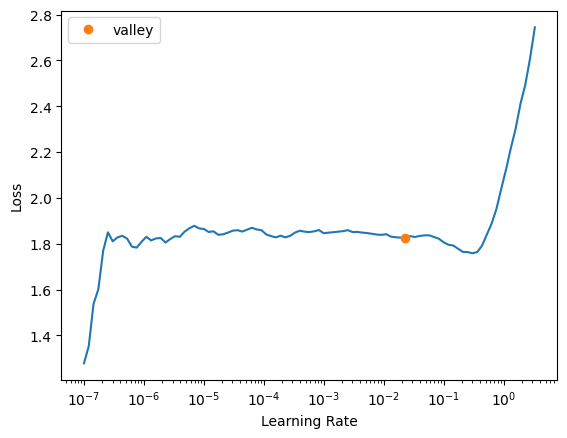

In [29]:
learn.lr_find()

In [30]:
learn.fit_one_cycle(5,5e-3)

epoch,train_loss,valid_loss,time
0,0.869436,0.923512,00:07
1,0.716796,0.883862,00:08
2,0.571424,0.860618,00:08
3,0.517045,0.841022,00:12
4,0.529301,0.835400,00:07


In [31]:
learn

In [31]:
learn.model

In [32]:
learn.weight

<bound method EmbeddingDotBias.weight of EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1665, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1665, 1)
)>